<a href="https://colab.research.google.com/github/jsmazorra/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/DS-Unit-4-Sprint-2-Neural-Networks/Johan_Mazorra_LS_DS13_Unit_4_Sprint_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron
    - Analyze and Compare
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:** also known as a node, this is a function within a neural network which recieves input values either from the raw original data, or from one or more previous nodes. It applies weight coefficients and a bias intercept to those input values, and the sum of those weights and biases applied to each prior input are run through an activation function to relativize the output of the node compared to all other outputs in its layer. This final relativized output is the activation value, which is then input to one or many subsequent nodes, or is interpreted as an output value of the neural network in the case of the output layer.
- **Input Layer:** the first layer of nodes in a neural network, recieving the normalized or transformed version of the original data, which enters the neural network as a vector. Each node corresponds to a feature of the observation. The input layer does itself have weights, biases, and an activation function, but it only outputs activation values to the next layer. It does not recieve activation values. It only recieves the vectorized raw data.
- **Hidden Layer:** a layer of nodes which does not recieve inputs from the original data. It only recieves activation values from previous nodes of the neural network. However, nodes in a hidden layer also do not present a final output value from the neural network. They recieve activation values, and must also pass activation values on to other nodes in subsequent layers. Hidden layer nodes are therefore intermediating nodes. They also have weights, biases, and an activation function.
- **Output Layer:** a layer of nodes which does not recive input activation values from the original data, but from previous nodes in the neural network; but unlike a hidden layer, it's output activation values are the final outputs of the neural network. These output activation values are interpreted as probablilities, each node either representing a class within the target, a target itself, or some medley of the two. Nodes in the output layer also have wights, biases, and activation functions, but their output activation values are the final interpretation of the neural network upon that data observation. No further nodes recieve activation values from the output layer.
- **Activation Function:** a function which relates the nodes that are members of the same layer. Each node being a function that presents to the activation function its weighted sum, the activation function then returns to the node an activation value that is calculated relative to all of the other nodes encapsulated by that activation function. It is that activation value that is then passed from one node to the next layer, or as an output.

Explain how back propagation works as if you were explaining it to a five year-old. Use your own words, but feel free to reference external materials for this question. 

Do you remember a few years ago, when you were 2, and the only thing that came out of your mouth was a question about this or that? Well sometimes, you would point at blue or green things, and ask: Is that red? And I would have to kindly tell you, "No, silly. That's green!" Or "No, that's blue", or "Yes, it is red!" if it was actually red. Anyway, you and I kept doing this until you finally understood that cardinals, stop signs, fire hydrants, fire fighters, and bricks were red; and that grass, violets, the midday sky, and your eyes were not red. That's what back propagation is. It's a neural network, in the computer's brain, changing its guesses about the world when it gets it wrong.

Remember our Simple Perceptron Class from Monday. In a simple prediction describe the process of making a prediction. How do you go from inputs to predicted output.

1] The raw data is vectorized, usually into a float value from between 1 and 0

2] A single observation is fed into the input layer as a vector, usually with each utilized feature being passed to a single input node.

3] Input nodes take the input value, multipy it by a weight, add a bias to that product, and pass that weighted sum into the activation function for the input layer.

4] The acivation function of the input layer uses a compression-type function to compress sometimes radically varying input values to within 1 and 0, relative to the range of other weighted sums it recieves from nodes of that layer. It then returns to the respective node its "squishified", or [1,0] compressed weighted sum (the activation value).

5] The node then passes its activation value on to other nodes in the next layer, as an input to that node's weight/bias function.

6] If the next node in the network, recieving that prior activation value, is a hidden layer node, steps 3-5 are repeated for that node and that layer, and it's activation value is passed onto one or many nodes in the subsequent layer.

7] If the next node in the network, recieving that prior activation value, is an output layer node, steps 3-5 are repeated for that node and that layer, but it's activation value is not passed into another node. It is output to us, the consumer of that data, assigned to a target or target class, as a probability that the observation it came from represents a result in that target or that target class.

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using Tensorflow Keras. After you build these two models, compare the results of the model.

In [0]:
"""
Our Dataset
"""
import numpy as np

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

In [2]:
# I'm going to see how these arrays look.
X[:2]

array([[1.76405235, 0.40015721],
       [0.97873798, 2.2408932 ]])

In [3]:
y[:2]

array([0, 0])

In [4]:
X.shape, y.shape

((300, 2), (300,))

### Simple Perceptron
Construct a simple perceptron using Keras. You model should have 1 dense layer with a single neuron and a sigmoid activation function. Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 

In [5]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

stop = EarlyStopping(monitor='accuracy', min_delta=0.01, patience=8)

model1 = Sequential([
      Dense(1,activation='sigmoid', input_dim=2)
])

model1.compile(optimizer='sgd', loss='binary_crossentropy', metrics='accuracy')

h1 = model1.fit(X,y,epochs=100,callbacks=[stop])

Epoch 1/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7590 - accuracy: 0.4833
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7560 - accuracy: 0.4867
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7529 - accuracy: 0.4867
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7501 - accuracy: 0.4933
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7471 - accuracy: 0.4967
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7444 - accuracy: 0.4967
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7416 - accuracy: 0.5033
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7390 - accuracy: 0.5067
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7368 - accuracy: 0.5033
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7342 - accuracy: 0.5100
Epoch 11/

### Multi-Layer Perceptron
Now construct a multi-layer perceptron using. Here are some architecture suggestions: 
- 2 Hidden Layers
- 5-32 Neurons in the Hidden Layers
- Your pick of activation function and optimizer
- Incorporate the Callback function below into your model

Your model should be called `model2` and make sure to save the results of your fit statement to a variable called `h2`. 

In [0]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .99999):   
            self.model.stop_training = True

In [7]:
model2 = Sequential([
      Dense(32,activation='relu', input_dim=2),
      Dense(8,activation='relu'),
      Dense(1,activation='sigmoid')
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

h2 = model2.fit(X,y,epochs=100,callbacks=[myCallback()])

Epoch 1/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7081 - accuracy: 0.5333
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6774 - accuracy: 0.5700
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6485 - accuracy: 0.7000
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6229 - accuracy: 0.8133
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5975 - accuracy: 0.8733
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5728 - accuracy: 0.9167
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5487 - accuracy: 0.9267
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5252 - accuracy: 0.9533
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5018 - accuracy: 0.9633
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4802 - accuracy: 0.9667
Epoch 11/

In [0]:
# Nice, got 100% accuracy in 74 epochs.

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. Install the package `mlxtend` into the environment you are using for the sprint challenge.


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [0]:
import mlxtend

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


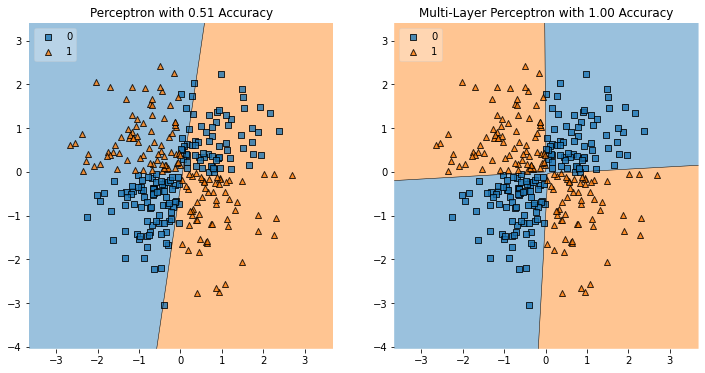

In [10]:
# Do Not change anything in this cell

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

Why does the Perceptron (`model1`) only achieve ~70% accuracy? What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y? 

Why might this property be useful in more complex data such as images?

The Single-Layer Perceptron performs much worse than the Multi-Layer Perceptron because it is unable to learn or apply meta-linear decision boundaries to the dataset, which is clearly quadrant in its characteristic.
The ability of the MLP to recognize meta-linear and multi-linear decision boundaries is useful for image classification because in natural images there are many lines and curves.

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3,0
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1


In [12]:
# Your Code Here
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [13]:
# Ok, I have to beat this baseline of 55%.
from sklearn.model_selection import train_test_split

X = df.drop(columns='target')
y = df['target']
X.shape,y.shape

((303, 13), (303,))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=8
    )

In [15]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2


In [16]:
# Let's scale and vectorize the data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
print(X_train_std[:2])

[[-1.6822868  -1.46385011  1.04009595 -2.09146154 -0.84286138 -0.39036003
   0.86473673  1.2598261  -0.70272837 -0.89413249  0.98186126 -0.71269665
  -0.5146532 ]
 [ 0.40209873  0.68313005 -0.94965283 -0.96971133  1.32764046 -0.39036003
   2.75001862 -0.42077301 -0.70272837  2.92791598 -2.29552392  2.22717702
  -2.17526754]]


In [0]:
X_train0, X_val, y_train0, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=8
    )

In [18]:
# Let's create the model now.
stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=16)

model3 = Sequential([
      Dense(32,activation='relu', input_dim=13),
      Dense(64,activation='relu'),
      Dense(16,activation='relu'),
      Dense(4,activation='relu'),
      Dense(1,activation='sigmoid')
])

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

result3 = model3.fit(
    X_train0,y_train0,
    validation_data=(X_val,y_val),
    epochs=100
    )

Epoch 1/100
7/7 [==============================] - 0s 41ms/step - loss: 29.4491 - accuracy: 0.4508 - val_loss: 4.8277 - val_accuracy: 0.3061
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 6.8696 - accuracy: 0.5337 - val_loss: 6.3152 - val_accuracy: 0.5510
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 4.1825 - accuracy: 0.5492 - val_loss: 0.7815 - val_accuracy: 0.5510
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6583 - accuracy: 0.5492 - val_loss: 0.6192 - val_accuracy: 0.5510
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6882 - accuracy: 0.5492 - val_loss: 0.5980 - val_accuracy: 0.5510
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6453 - accuracy: 0.5492 - val_loss: 0.6174 - val_accuracy: 0.5510
Epoch 7/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6893 - accuracy: 0.5492 - val_loss: 0.5938 - val_accuracy: 0.5510
Epoch 8/100
7/7 [==

In [19]:
max(result3.history['val_accuracy'])

0.7142857313156128

In [20]:
# We beat the dummy baseline with 71% accuracy, but we can do much better.
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, SGD, Nadam, Adadelta
import numpy as np

np.random.seed(8)

def create_model(learning_rate=0.01, optimizer=Adam()):
  model = Sequential()
  model.add(Dense(32,activation='relu', input_dim=13))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(16,activation='relu'))
  model.add(Dense(4,activation='relu'))
  model.add(Dense(1,activation='relu'))
  optim = optimizer(learning_rate=learning_rate)
  model.compile(optimizer=optim, loss='binary_crossentropy', metrics='accuracy')
  return model

model4 = KerasClassifier(build_fn=create_model, verbose=0)

para_grid = {
    'batch_size': [8, 16, 32, 64], 'epochs': [20],
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'optimizer': [Adam, SGD, Nadam, Adadelta],
    }

grid = GridSearchCV(estimator=model4, param_grid=para_grid, n_jobs=1)
grid_result = grid.fit(X_train_std, y_train)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.8596938729286194 using {'batch_size': 8, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>}
Means: 0.8596938729286194, Stdev: 0.03190306617064138 with: {'batch_size': 8, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>}
Means: 0.6121598720550537, Stdev: 0.1516241113922098 with: {'batch_size': 8, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>}
Means: 0.7693877577781677, Stdev: 0.12029311686570886 with: {'batch_size': 8, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.nadam.Nadam'>}
Means: 0.4380102038383484, Stdev: 0.059561691098861974 with: {'batch_size': 8, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adadelta.Adadelta'>}
Means: 0.7556122362613678, Stdev: 0.15213209216003606 with: {'batch_size'

In [0]:
# This GridSearch alleges that Adam (the optimizer I'm currently using) is the best optimizer. 
# It returns an accuracy of 85.96% (basically 86%) at a learning rate of 0.001, and a batch size of 8.
# I'm going to try it again with the recommended batch size.

In [21]:
def create_model(learning_rate=0.01, optimizer=Adam()):
  model = Sequential()
  model.add(Dense(32,activation='relu', input_dim=13))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(16,activation='relu'))
  model.add(Dense(4,activation='relu'))
  model.add(Dense(1,activation='relu'))
  optim = Adam(learning_rate=learning_rate)
  model.compile(optimizer=optim, loss='binary_crossentropy', metrics='accuracy')
  return model

model4 = KerasClassifier(build_fn=create_model, verbose=0)

para_grid = {
    'batch_size': [8], 'epochs': [20],
    'learning_rate': [0.0001, 0.0005, 0.001, 0.005, 0.01],
    }

grid = GridSearchCV(estimator=model4, param_grid=para_grid, n_jobs=1)
grid_result = grid.fit(X_train_std, y_train)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.8307823181152344 using {'batch_size': 8, 'epochs': 20, 'learning_rate': 0.005}
Means: 0.6034013748168945, Stdev: 0.12457741877020581 with: {'batch_size': 8, 'epochs': 20, 'learning_rate': 0.0001}
Means: 0.7227040767669678, Stdev: 0.14473837916655716 with: {'batch_size': 8, 'epochs': 20, 'learning_rate': 0.0005}
Means: 0.7326530635356903, Stdev: 0.1686911491028175 with: {'batch_size': 8, 'epochs': 20, 'learning_rate': 0.001}
Means: 0.8307823181152344, Stdev: 0.029191576890177602 with: {'batch_size': 8, 'epochs': 20, 'learning_rate': 0.005}
Means: 0.6933673441410064, Stdev: 0.1403023480313341 with: {'batch_size': 8, 'epochs': 20, 'learning_rate': 0.01}


In [0]:
# This one actually did worse than the last one with 83.07% accuracy using the adam optimizer, batch size of 8, and learning rate of 0.005.
# Now I'm going to do the final test accuracy.

In [23]:
stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=16)

model4 = Sequential([
      Dense(32,activation='relu', input_dim=13),
      Dense(64,activation='relu'),
      Dense(16,activation='relu'),
      Dense(4,activation='relu'),
      Dense(1,activation='sigmoid')
])

optim = Nadam(learning_rate=0.005)

model4.compile(optimizer=optim, loss='binary_crossentropy', metrics='accuracy')

result4 = model3.fit(
    X_train,y_train, batch_size=8, 
    validation_data=(X_test,y_test),
    epochs=100 ,callbacks=[stop]
    )

Epoch 1/100
31/31 [==============================] - 0s 7ms/step - loss: 0.6008 - accuracy: 0.7355 - val_loss: 0.8024 - val_accuracy: 0.6230
Epoch 2/100
31/31 [==============================] - 0s 6ms/step - loss: 0.6040 - accuracy: 0.7025 - val_loss: 0.6928 - val_accuracy: 0.4918
Epoch 3/100
31/31 [==============================] - 0s 6ms/step - loss: 0.6939 - accuracy: 0.4876 - val_loss: 0.7000 - val_accuracy: 0.4754
Epoch 4/100
31/31 [==============================] - 0s 6ms/step - loss: 0.6448 - accuracy: 0.5785 - val_loss: 0.6740 - val_accuracy: 0.6066
Epoch 5/100
31/31 [==============================] - 0s 7ms/step - loss: 0.5838 - accuracy: 0.7314 - val_loss: 0.7005 - val_accuracy: 0.6393
Epoch 6/100
31/31 [==============================] - 0s 7ms/step - loss: 0.6036 - accuracy: 0.6901 - val_loss: 0.6956 - val_accuracy: 0.4918
Epoch 7/100
31/31 [==============================] - 0s 7ms/step - loss: 0.6598 - accuracy: 0.5785 - val_loss: 0.7128 - val_accuracy: 0.6230
Epoch 8/100
3

In [25]:
max(result4.history['accuracy'])

0.7644628286361694

In [0]:
# Finally got a 76.45& accuracy after 40 epochs this time using the Nadam optimizer, learning rate of 0.005, and the batch size of 8.